<a href="https://colab.research.google.com/github/MalenaSancho/data-mining/blob/main/notebooks/data_mining_3.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización

## Pasos previos

In [1]:
# Instalamos la librería para visualizar diagramas de árbol

!pip install squarify

In [2]:
# Importamos las librerías de Python que necesitaremos en este notebook

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud  # Para crear las nubes de palabras
import spacy  # Para análisis de texto
import squarify  # Para diagramas de árbol

spacy.cli.download('en_core_web_md')  # Instalar el modelo de Spacy y hacer análisis de texto en inglés
sns.set_style('whitegrid')  # Pone una malla de fondo bastante mona para Seaborn. El tema por defecto es 'darkgrid'

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Vamos a trabajar de nuevo con un conjunto de datos en formato CSV que contiene estadísticas sobre ventas históricas de videojuegos.

Cada fila contiene la siguiente información:

* `Rank`: ranking de ventas totales
* `Name`: nombre del videojuego
* `Platform`: plataforma en la que se publicó el juego (e.g. PC, PS4, ...)
* `Year`: año de publicación del juego
* `Genre`: género (e.g. acción, aventuras, ...)
* `Publisher`: compañía distribuidora
* `NA_Sales`: ventas en Norte América (en millones)
* `EU_Sales`: ventas en Europa (en millones)
* `JP_Sales`: ventas en Japón (en millones)
* `Other_Sales`: ventas en el resto del mundo (en millones)
* `Global_Sales`: ventas mundiales totales (en millones)

In [3]:
# Obtención de los ficheros CSV con los datos

!wget https://raw.githubusercontent.com/d-tomas/data-mining/main/datasets/video_game_sales.csv

--2026-02-10 16:08:53--  https://raw.githubusercontent.com/d-tomas/data-mining/main/datasets/video_game_sales.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1355781 (1.3M) [text/plain]
Saving to: ‘video_game_sales.csv’

video_game_sales.cs 100%[===================>]   1.29M  --.-KB/s    in 0.06s   

2026-02-10 16:08:53 (23.2 MB/s) - ‘video_game_sales.csv’ saved [1355781/1355781]



In [4]:
# Cargamos los datos en formato CSV

data = pd.read_csv('video_game_sales.csv')
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## Cuarteto de Anscombe

Antes de empezar a trabajar con los datos sobre venta de videojuegos, vamos a ver un ejemplo práctico de la importancia de la visualización en la interpretación de los datos.

In [5]:
# Descargamos los dos conjuntos de datos

!wget https://raw.githubusercontent.com/d-tomas/data-mining/main/datasets/anscombe_1.csv
!wget https://raw.githubusercontent.com/d-tomas/data-mining/main/datasets/anscombe_2.csv

--2026-02-10 16:08:53--  https://raw.githubusercontent.com/d-tomas/data-mining/main/datasets/anscombe_1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3387 (3.3K) [text/plain]
Saving to: ‘anscombe_1.csv’

anscombe_1.csv      100%[===================>]   3.31K  --.-KB/s    in 0s      

2026-02-10 16:08:53 (51.1 MB/s) - ‘anscombe_1.csv’ saved [3387/3387]

--2026-02-10 16:08:53--  https://raw.githubusercontent.com/d-tomas/data-mining/main/datasets/anscombe_2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2348 (2.3K) [text/p

In [6]:
# Creamos un DataFrame para cada uno de ellos

anscombe_1 = pd.read_csv('anscombe_1.csv')
anscombe_2 = pd.read_csv('anscombe_2.csv')

In [7]:
# Los mostramos a ver qué pinta tienen

anscombe_1

,x,y
0,39.039273,69.918472
1,69.343582,78.088536
2,30.168912,82.831142
3,66.920944,74.606251
4,25.575540,81.845533
...,...,...
137,68.251611,15.442741
138,77.133304,65.926744
139,70.381796,93.684955
140,36.261717,75.003879


In [8]:
# Y el otro

anscombe_2

,x,y
0,55.3846,97.1795
1,51.5385,96.0256
2,46.1538,94.4872
3,42.8205,91.4103
4,40.7692,88.3333
...,...,...
137,39.4872,25.3846
138,91.2821,41.5385
139,50.0000,95.7692
140,47.9487,95.0000


In [9]:
# Calculamos sus estadísticas básicas: media, desviación estándar y correlación

print('Dataset Anscombe 1')
print('Muestras: ' + str())
print('Media x: ' + '{:.3f}'.format(anscombe_1.mean()['x']))
print('Media y: ' + '{:.3f}'.format(anscombe_1.mean()['y']))
print('Desviación x: ' + '{:.3f}'.format(anscombe_1.std()['x']))
print('Desviación y: ' + '{:.3f}'.format(anscombe_1.std()['y']))
print('Correlación: ' + '{:.3f}'.format(anscombe_1.corr()['x']['y']))

Dataset Anscombe 1
Muestras: 
Media x: 54.263
Media y: 47.833
Desviación x: 16.764
Desviación y: 26.935
Correlación: -0.064


In [10]:
# Lo mismo para el segundo dataset

print('Dataset Anscombe 2')
print('Media x: ' + '{:.3f}'.format(anscombe_2.mean()['x']))
print('Media y: ' + '{:.3f}'.format(anscombe_2.mean()['y']))
print('Desviación x: ' + '{:.3f}'.format(anscombe_2.std()['x']))
print('Desviación y: ' + '{:.3f}'.format(anscombe_2.std()['y']))
print('Correlación: ' + '{:.3f}'.format(anscombe_2.corr()['x']['y']))

Dataset Anscombe 2
Media x: 54.263
Media y: 47.832
Desviación x: 16.765
Desviación y: 26.935
Correlación: -0.064


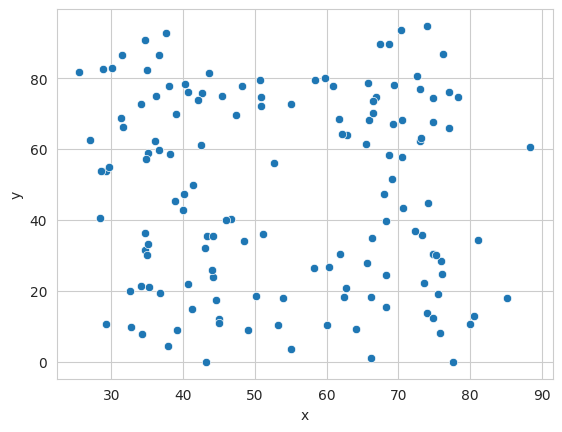

In [11]:
# Visualizamos el primer dataset

sns.scatterplot(data=anscombe_1, x='x', y='y')
plt.show()

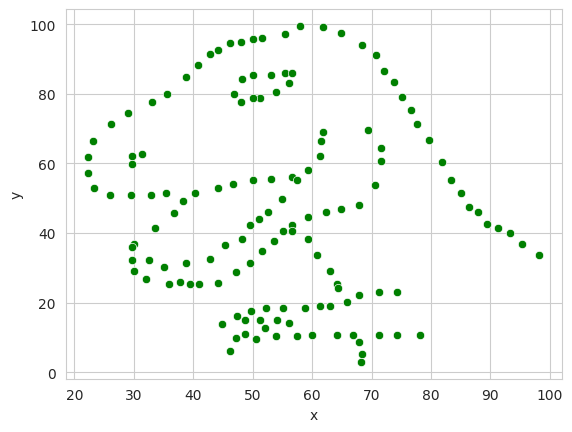

In [12]:
# Visualizamos el segundo dataset

sns.scatterplot(data=anscombe_2, x='x', y='y', color='green')
plt.show()

## Diagrama de barras

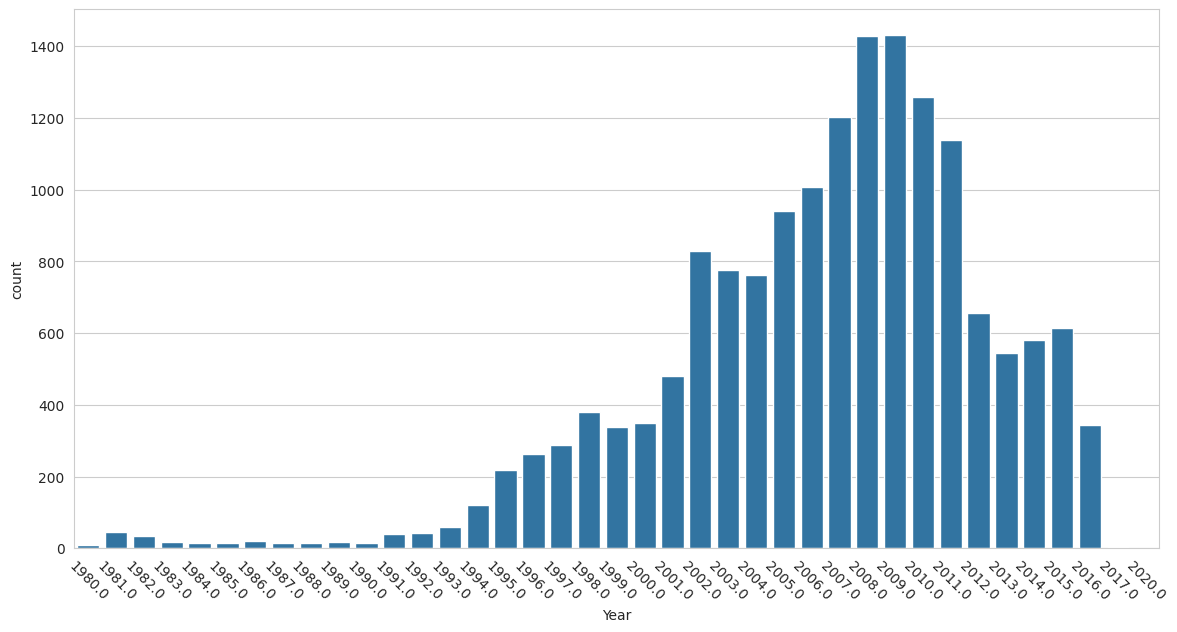

In [13]:
# ¿Qué año se vendieron más videojuegos?
# Se puede considerar 'Year' como un valor discreto, por lo que un diagrama de barras es adecuado

plt.figure(figsize=(14,7))
sns.countplot(x='Year', data=data)
plt.xticks(rotation=-45)  # Rotamos las etiquetas para que no se solapen
plt.show()

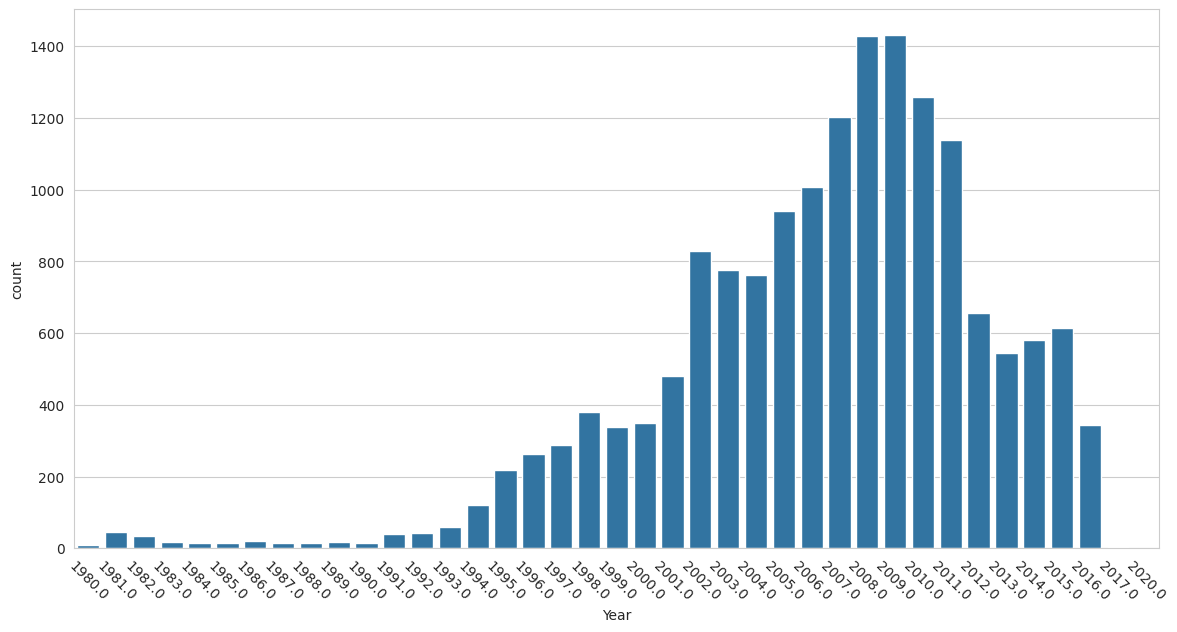

In [14]:
# Por cierto, los diagramas se pueden guardar en fichero

plt.figure(figsize=(14,7))
sns.countplot(x='Year', data=data)
plt.xticks(rotation=-45)  # Rotamos las etiquetas para que no se solapen
plt.savefig('grafico.png')  # Fichero de salida

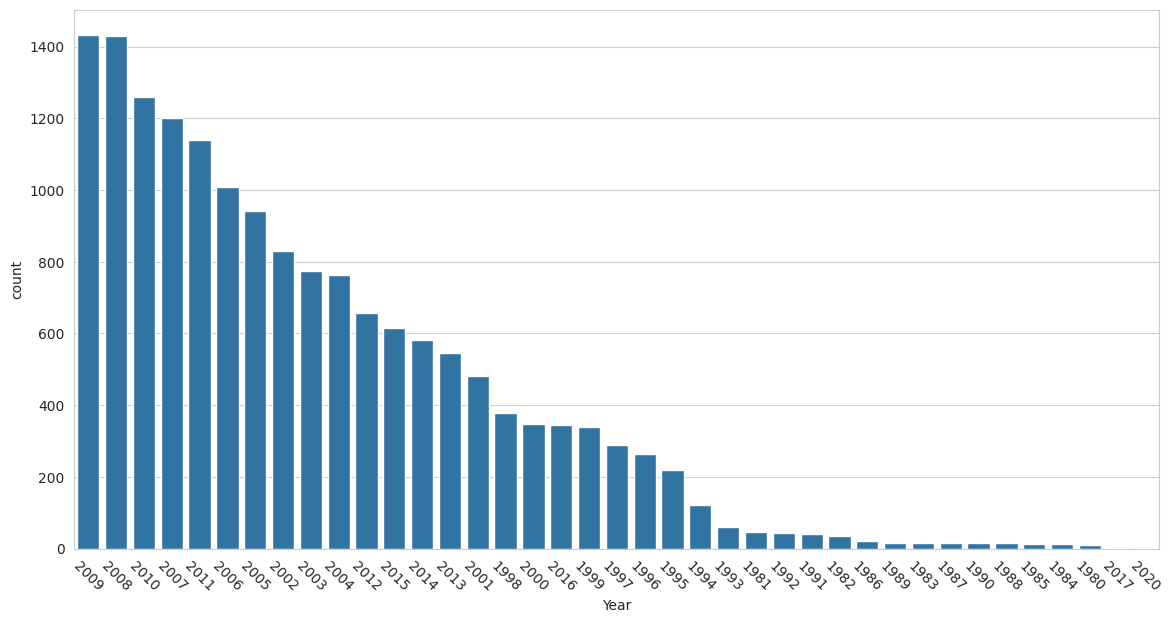

In [15]:
# ¡Un diagrama de barras se puede ordenar!

plt.figure(figsize=(14, 7))
sns.countplot(x='Year', data=data, order=data['Year'].value_counts().index)
# Si además queremos quitar la molesta parte decimal de las etiquetas del eje x...
locs, labels = plt.xticks()
labels = [int(t) for t in data['Year'].value_counts().index]
plt.xticks(locs, labels, rotation=-45)
plt.show()


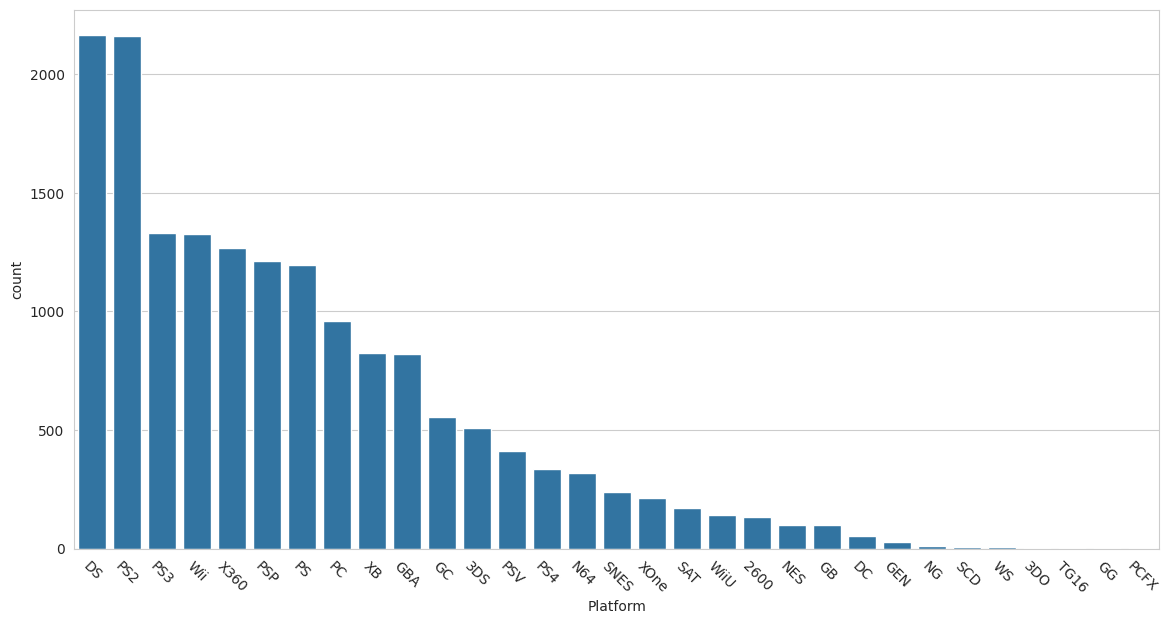

In [16]:
# Otro ejemplo: ¿qué plataforma tiene más juegos en este ranking?

plt.figure(figsize=(14,7))
sns.countplot(x='Platform', data=data, order=data['Platform'].value_counts().index)
plt.xticks(rotation=-45)
plt.show()

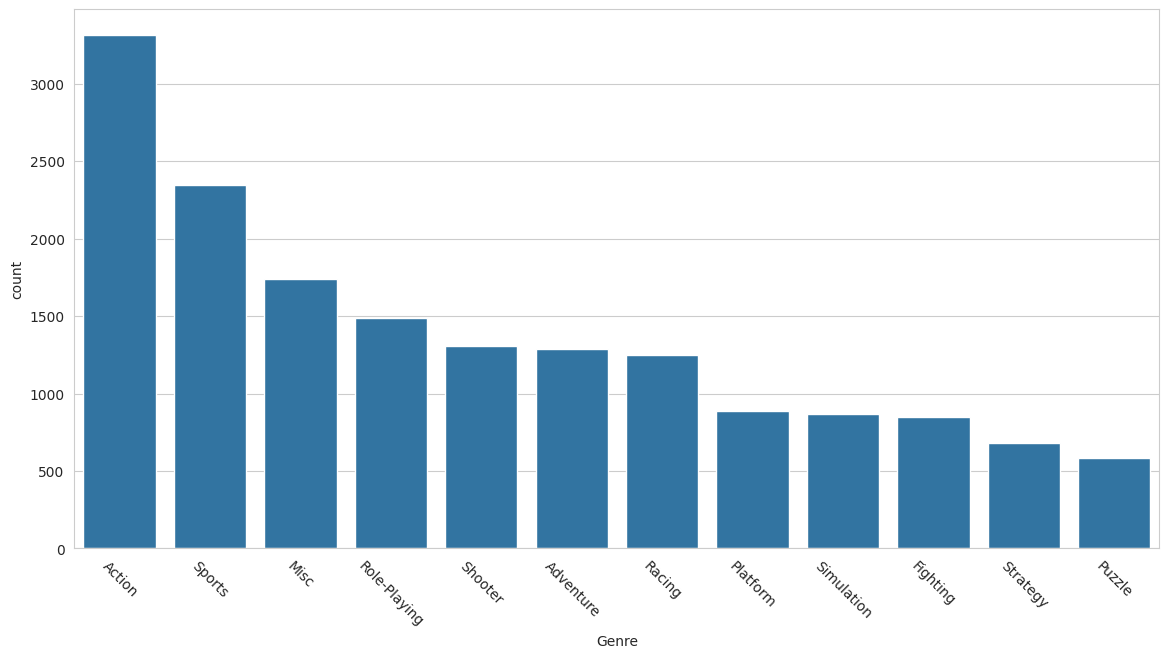

In [17]:
# Y ya que estamos, ¿qué género es el más popular?

plt.figure(figsize=(14,7))
sns.countplot(x='Genre', data=data, order=data['Genre'].value_counts().index)
plt.xticks(rotation=-45)
plt.show()

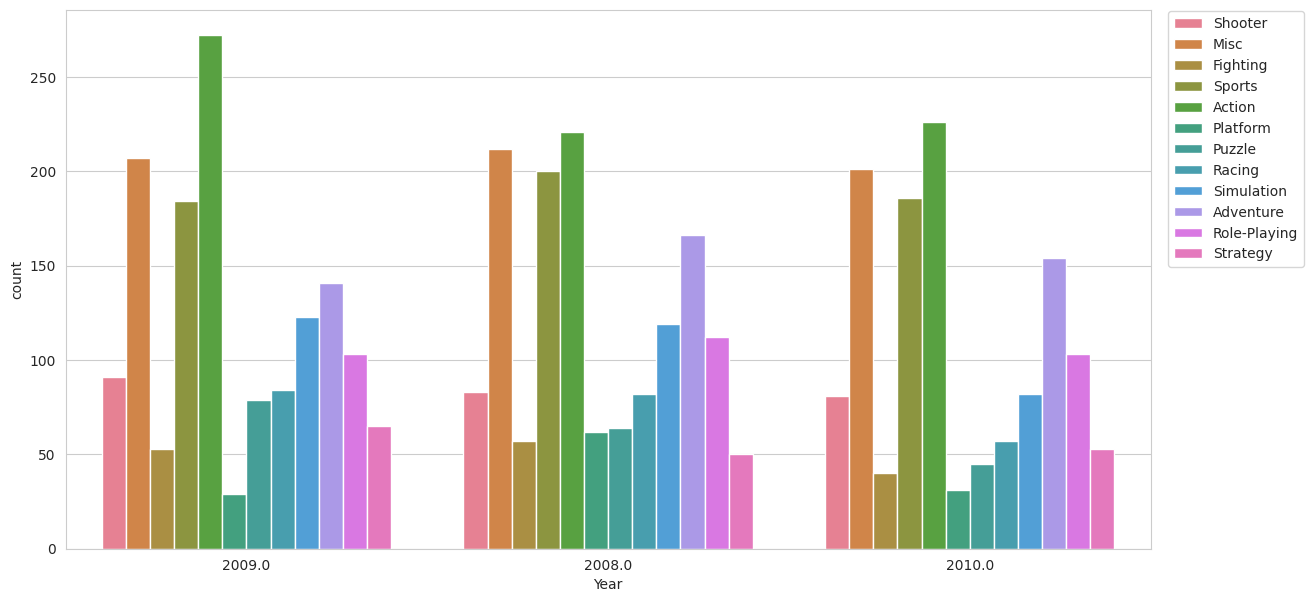

In [18]:
# Número de juegos por género en los tres años con más juegos publicados
# Podemos añadir una dimensión más a la visualización con el parámetro 'hue'

plt.figure(figsize=(14, 7))
sns.countplot(x='Year', data=data, hue='Genre', order=data['Year'].value_counts().iloc[:3].index)
plt.legend(bbox_to_anchor=(1.01, 1.01), loc=2)  # Para sacar la leyenda fuera del gráfico
plt.show()

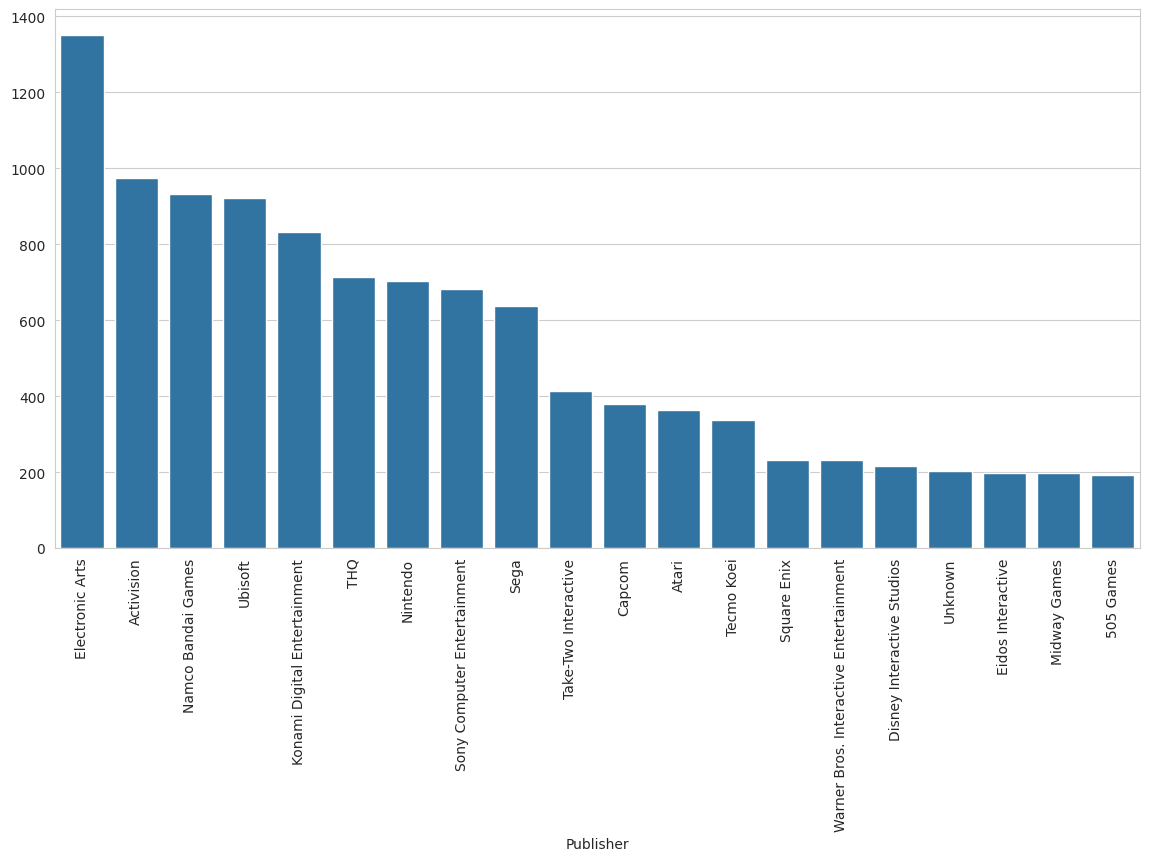

In [19]:
# ¿Y qué compañía ha lanzado más juegos al mercado?
# Usamos 'barplot' en lugar de 'countplot' porque en 'publisher_counts' ya tenemos la cuenta hecha

publisher_counts = data['Publisher'].value_counts()[:20]  # Nos quedamos con los veinte primeros

plt.figure(figsize=(14,7))
sns.barplot(x=publisher_counts.index, y=publisher_counts.values)
plt.xticks(rotation=90)  # Rotamos las etiquetas para que no se solapen
plt.show()

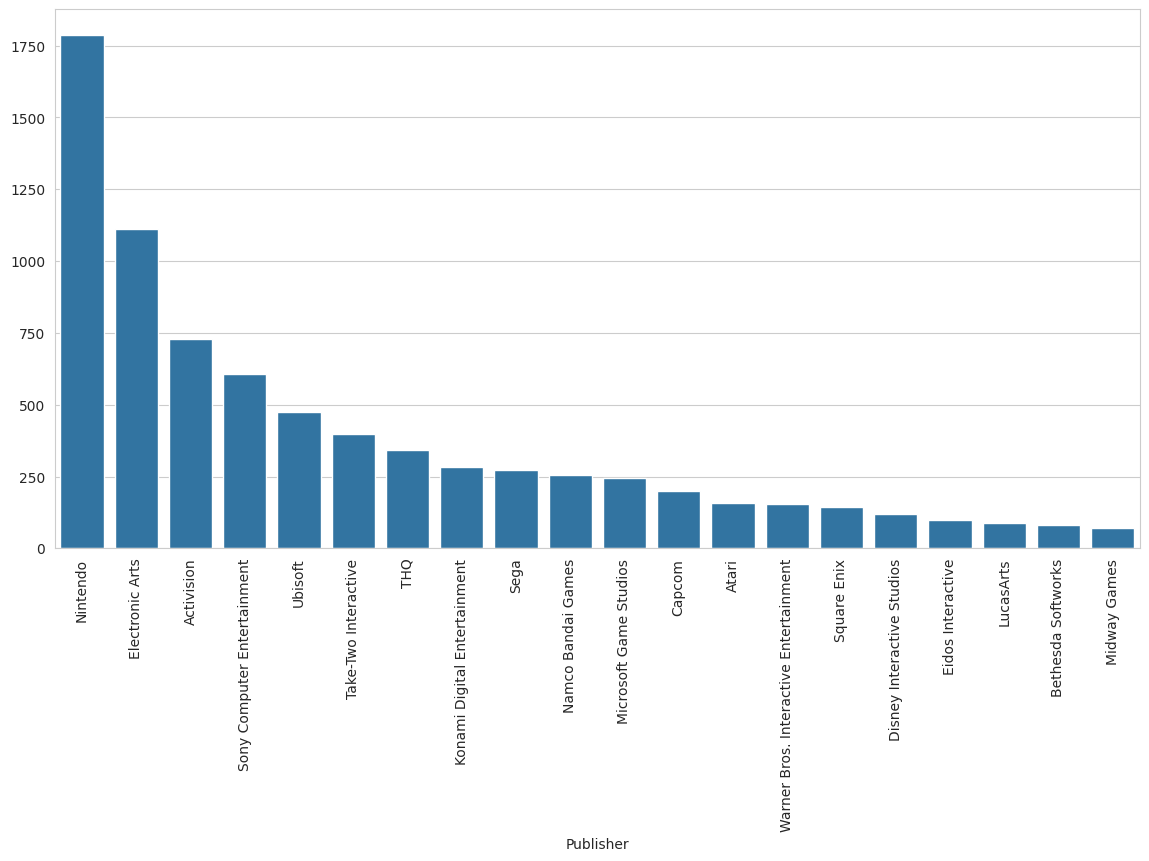

In [20]:
# Lo realmente importantes: ¿qué compañía ha vendido más juegos todos estos años?
# Podemos usar 'barplot' de nuevo para eso

publisher_sales = data.groupby(by=['Publisher'])['Global_Sales'].sum()  # Agrupamos ventas por compañía
publisher_sales = publisher_sales.sort_values(ascending=False)[:20]  # Nos quedamos con el Top 20

plt.figure(figsize=(14, 7))
sns.barplot(x=publisher_sales.index, y=publisher_sales.values)
plt.xticks(rotation=90)
plt.show()

## Histograma

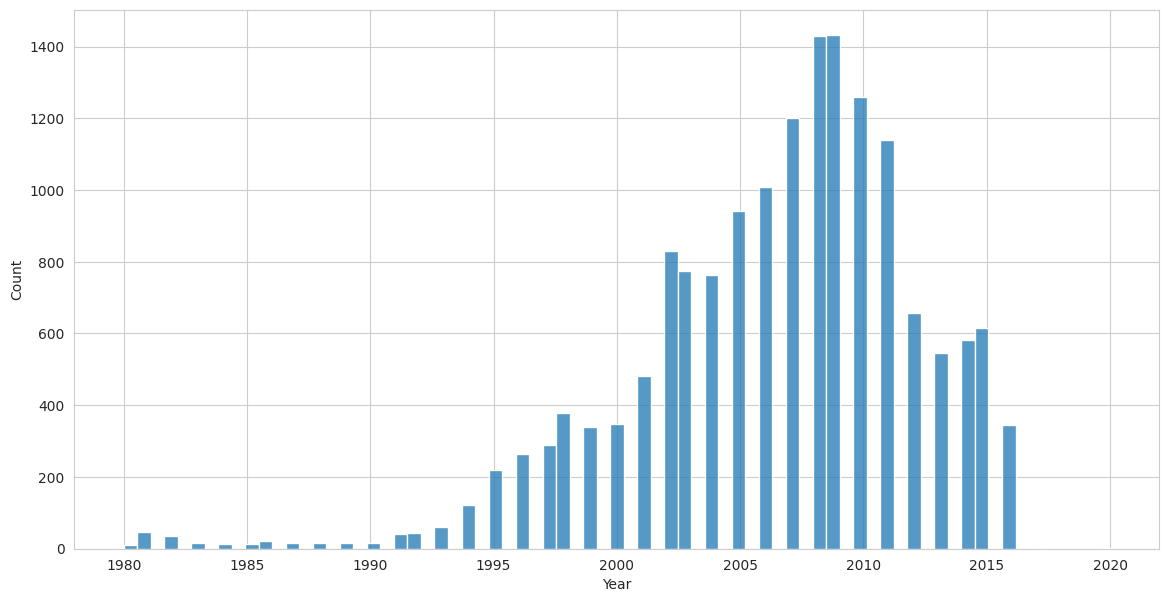

In [21]:
# ¿Qué año se vendieron más videojuegos?
# Los años se pueden considerar valores discretos, por lo que mejor un diagrama de barras que un histograma, pero bueno

plt.figure(figsize=(14,7))  # Fijamos el tamaño de la figura con Matplotlib
sns.histplot(x='Year', data=data)
plt.show()

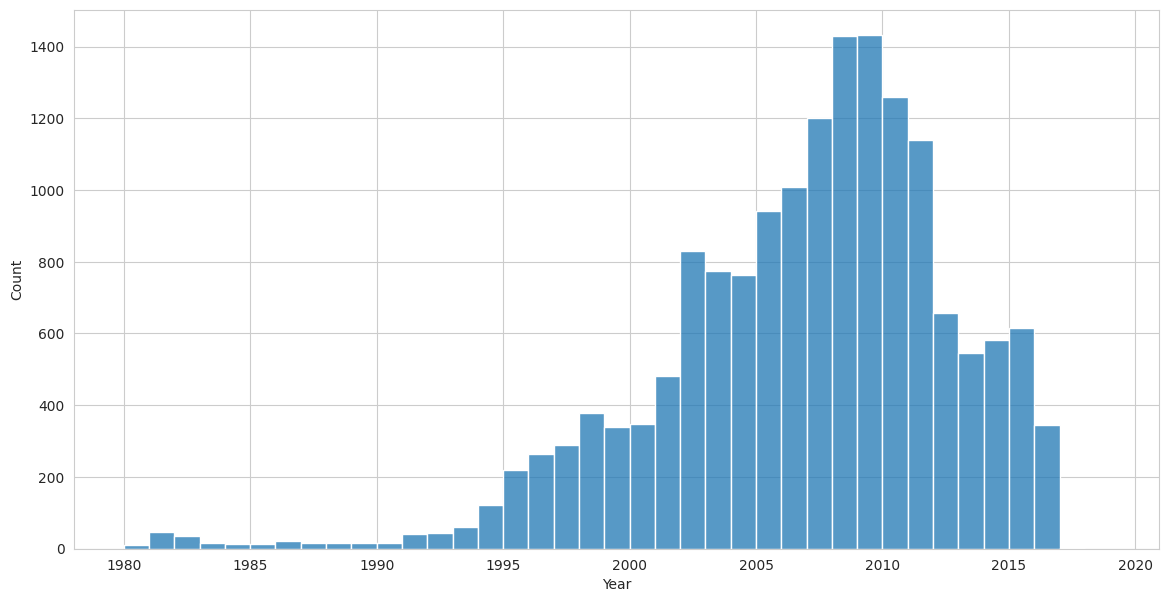

In [22]:
# Podemos definir el conjunto de contenedores (bins) del eje x

plt.figure(figsize=(14,7))
sns.histplot(x='Year', data=data, bins=[x for x in range(1980,2020)])
plt.show()

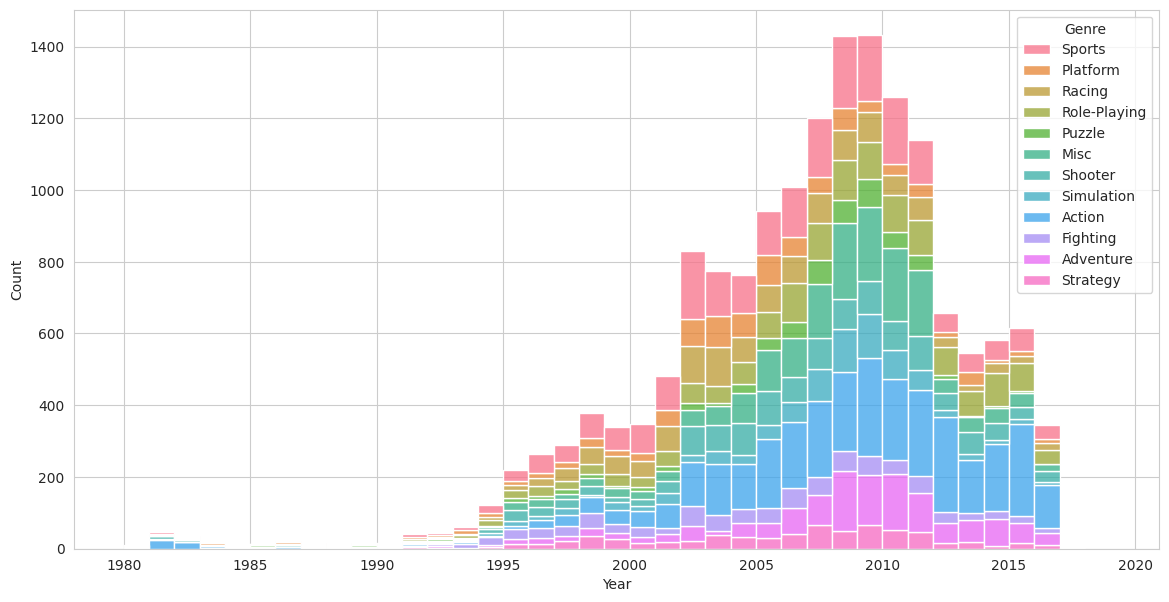

In [23]:
# Podemos tener un gráfico apilado (multiple='stack') donde se distingan los juegos de cada género por año
# Otra opción interesante de visualización es multiple='fill'
# El parámetro 'hue' permite añadir una dimensión más al gráfico

plt.figure(figsize=(14, 7))
sns.histplot(x='Year', data=data, bins=[x for x in range(1980,2020)], hue='Genre', multiple='stack')
plt.show()

## Diagrama de densidad

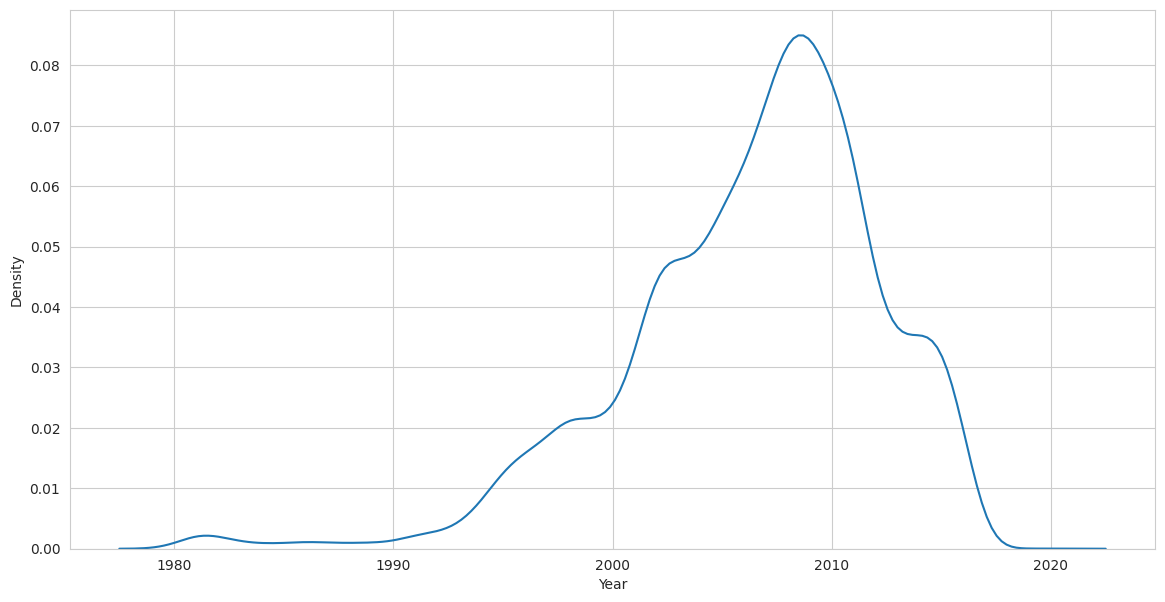

In [24]:
# Podemos usar la estimación de densidad de kernel para obtener un gráfico más suavizado
# Ya no hay que preocuparse del número de contenedores (bins)

plt.figure(figsize=(14,7))
sns.kdeplot(data=data, x='Year')
plt.show()

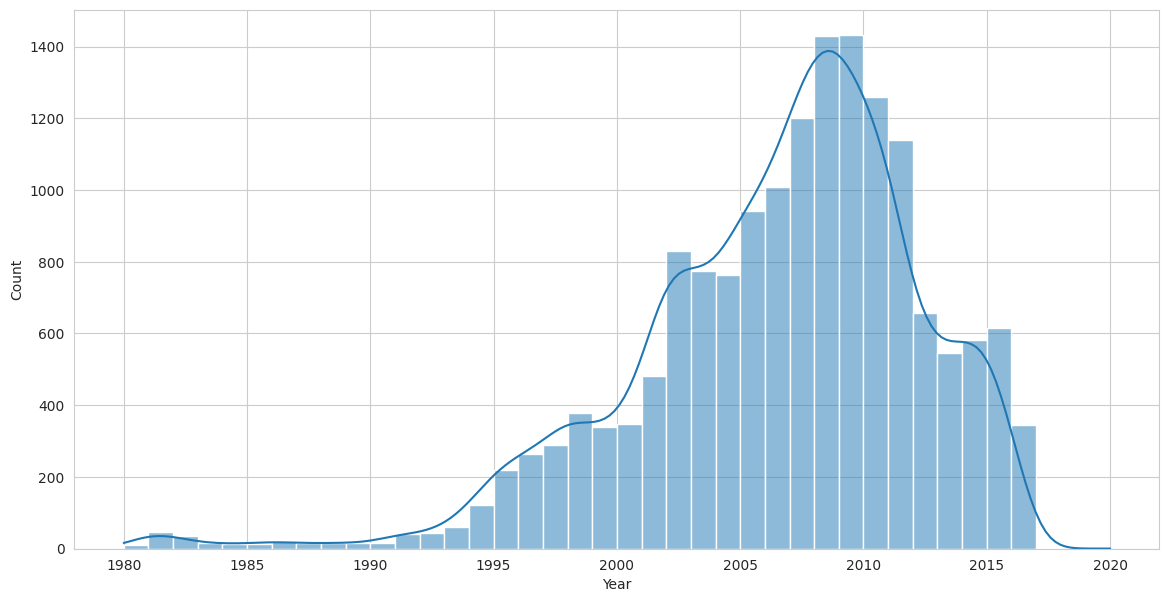

In [25]:
# Podemos superponer el gráfico de densidad al histograma anterior
# Añadimos al 'histplot' el parámetro 'kde=True'

plt.figure(figsize=(14,7))
sns.histplot(x='Year', data=data, bins=[x for x in range(1980,2020)], kde=True)
plt.show()

## Diagrama de líneas

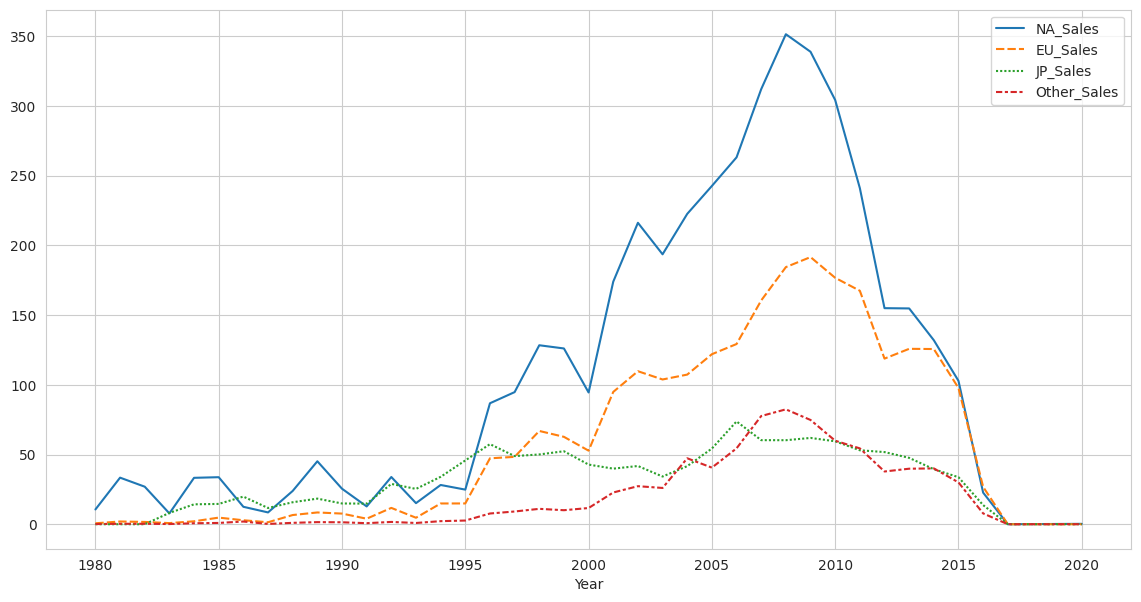

In [26]:
# Comparamos cómo evolucionan las ventas en los distintos países a lo largo de los años

year_sales = data[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].groupby(by='Year').sum()

plt.figure(figsize=(14, 7))
sns.lineplot(data=year_sales)
plt.show()

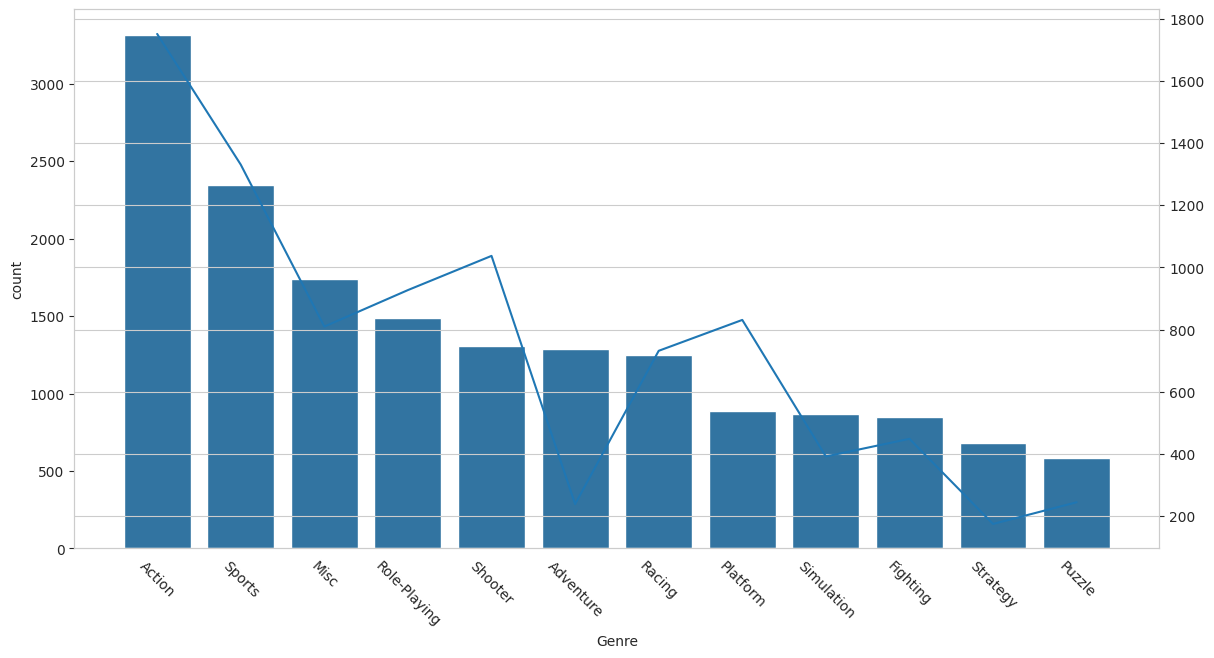

In [27]:
# Podemos superponer el diagrama de líneas a un gráfico de barras para comparar diferentes dimensiones
# En este caso, comparamos el número de juegos publicados en un género (barras) con sus ventas (líneas)

# Diagrama de barras
genre_sales = data['Genre'].value_counts()
fig, ax = plt.subplots(figsize=(14,7))  # Vamos a superponer dos gráficas
sns.countplot(x='Genre', data=data, order=genre_sales.index)  # Ordenamos por mayor ventas
plt.xticks(rotation=-45)  # Rotamos las etiquetas para que no se solapen

# Diagrama de líneas
genre_sales2 = data.groupby(by=['Genre'])['Global_Sales'].sum()  # Agrupamos ventas por género
genre_sales2 = genre_sales2.sort_values(ascending=False)
genre_sales2 = genre_sales2.reindex(index = genre_sales.index)
ax.grid(False)  # Evitamos que se muestren dos mayas
ax.twinx()
sns.lineplot(x=genre_sales2.index, y=genre_sales2.values)
plt.xticks(rotation=-45)
plt.show()

## Diagrama de dispersión

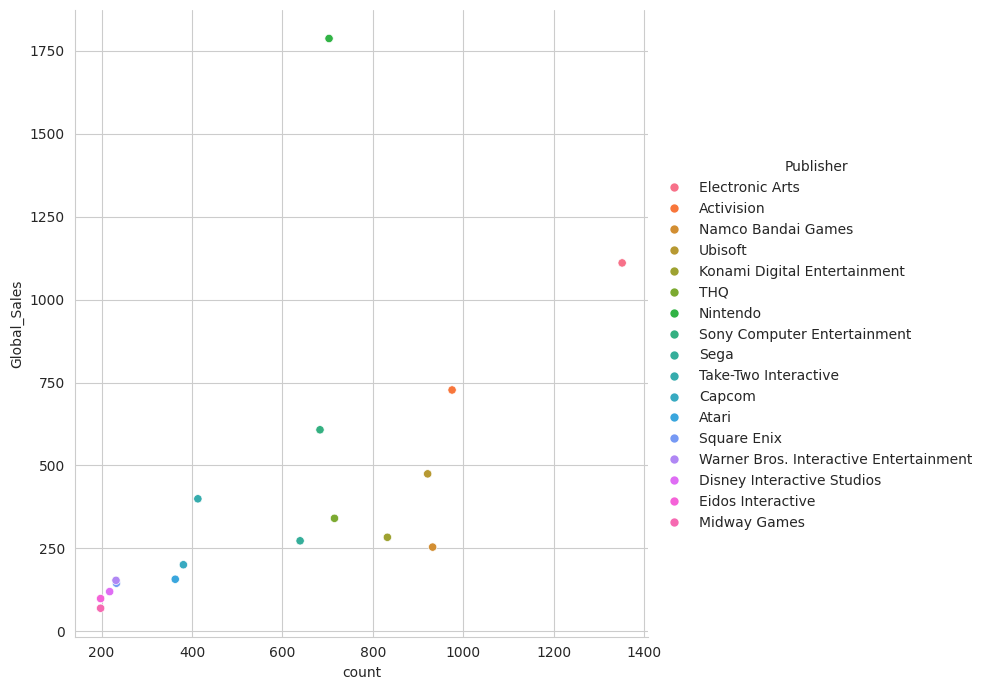

In [28]:
# ¿Qué relación hay entre número de lanzamientos y las ventas globales?
# De nuevo, el argumento 'hue' de 'relplot' nos permite expresar una tercera dimensión mediante el color

combined = pd.concat([publisher_counts, publisher_sales], axis=1).dropna()

sns.relplot(x='count', y='Global_Sales', hue='Publisher', data=combined, height=7)
plt.show()

# También se puede usar 'lmplot' y 'scatterplot' para comparar variables numéricas
# Lo mismo con 'lmplot': sns.lmplot(x='count', y='Global_Sales', hue='Publisher', data=combined, height=7)
# Lo mismo con 'scatterplot': sns.scatterplot(x='count', y='Global_Sales', hue='Publisher', data=combined)

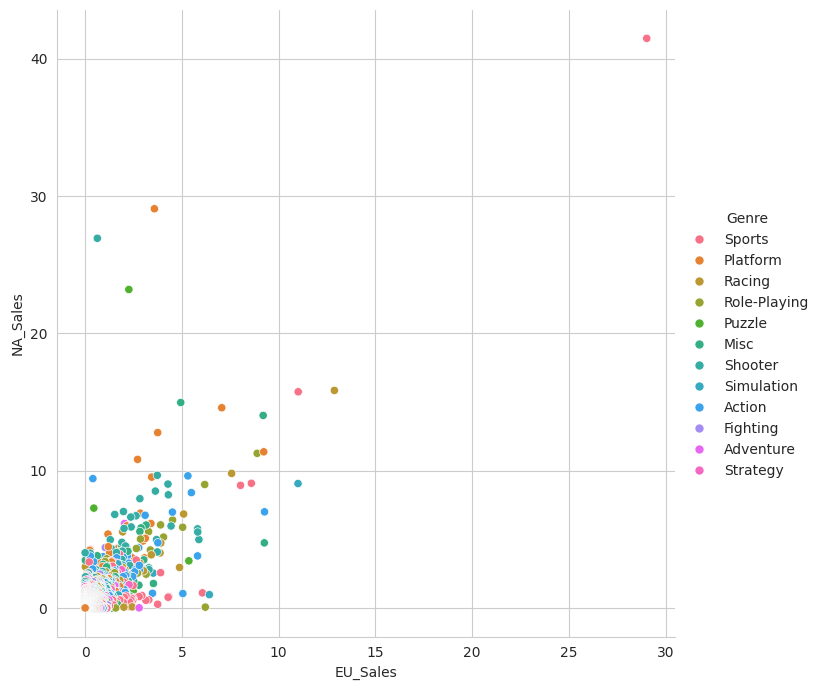

In [29]:
# ¿Qué relación hay entre ventas en Europa y Estados Unidos?

sns.relplot(x='EU_Sales', y='NA_Sales', hue='Genre', data=data, height=7)
plt.show()

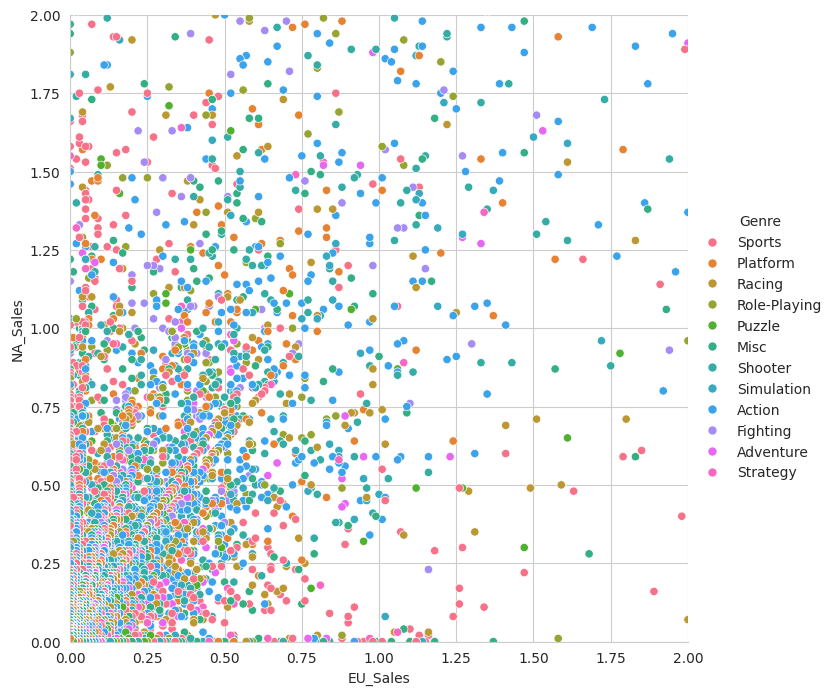

In [30]:
# Si cambiamos los límites de los ejes, se ve mejor el mogollón

sns.relplot(x='EU_Sales', y='NA_Sales', hue='Genre', data=data, height=7)
plt.ylim(0, 2)  # Valores límite del eje y
plt.xlim(0, 2)
plt.show()

## Mapa de calor

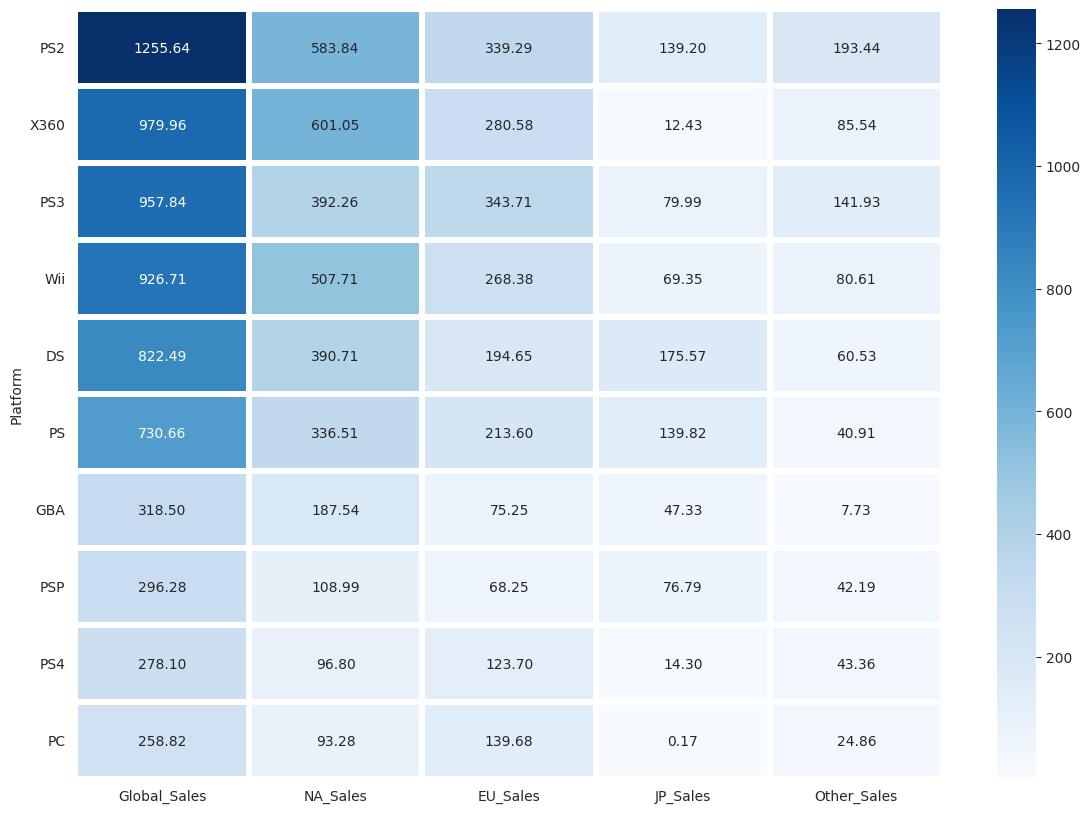

In [31]:
# Ventas globales por plataforma

platform_sales = data[['Platform', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].groupby(by=['Platform']).sum()
platform_sales = platform_sales.sort_values(by='Global_Sales', ascending=False)[:10]  # Nos quedamos con el Top 10

plt.figure(figsize=(14, 10))
sns.heatmap(platform_sales, annot=True, fmt='.2f', linewidth=3, cmap='Blues')
plt.yticks(rotation=0)
plt.show()

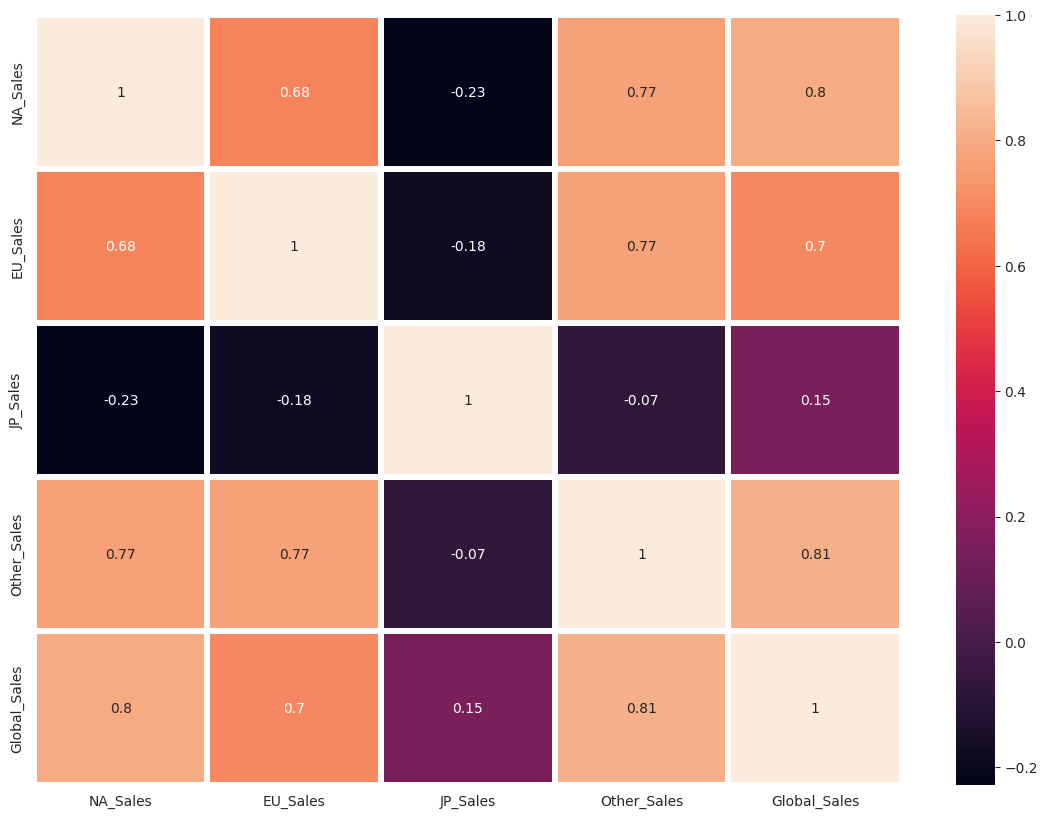

In [32]:
# Calculamos la correlación entre ventas con 'corr'
# Usamos 'spearman' en lugar de 'pearson' para la correlación porque las variables no siguen una distribución normal

plt.figure(figsize=(14,10))
sns.heatmap(data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr('spearman'), annot=True, linewidth=3)
plt.show()

## Diagrama de caja

In [33]:
# Para cada año contamos cuántos juegos hay de cada género y creamos un nuevo DataFrame

data2 = pd.DataFrame(columns=data['Genre'].unique())
for column in data2:
  data2[column] = data[data['Genre'] == column].groupby(by=['Year']).count()['Rank']  # 'Rank' o cualquier otra
data2

,Sports,Platform,Racing,Role-Playing,Puzzle,Misc,Shooter,Simulation,Action,Fighting,Adventure,Strategy
Year,,,,,,,,,,,,
1980.0,1,NaN,NaN,NaN,NaN,4.0,2.0,NaN,1,1.0,NaN,NaN
1981.0,4,3.0,1.0,NaN,2.0,NaN,10.0,1.0,25,NaN,NaN,NaN
1982.0,2,5.0,2.0,NaN,3.0,1.0,5.0,NaN,18,NaN,NaN,NaN
1983.0,1,5.0,NaN,NaN,1.0,1.0,1.0,NaN,7,NaN,1.0,NaN
1984.0,2,1.0,3.0,NaN,3.0,1.0,3.0,NaN,1,NaN,NaN,NaN
1985.0,1,4.0,NaN,NaN,4.0,NaN,1.0,1.0,2,1.0,NaN,NaN
1986.0,3,6.0,1.0,1.0,NaN,NaN,4.0,NaN,6,NaN,NaN,NaN
1987.0,4,2.0,NaN,3.0,NaN,NaN,2.0,NaN,2,2.0,1.0,NaN
1988.0,2,4.0,1.0,3.0,1.0,NaN,1.0,1.0,2,NaN,NaN,NaN


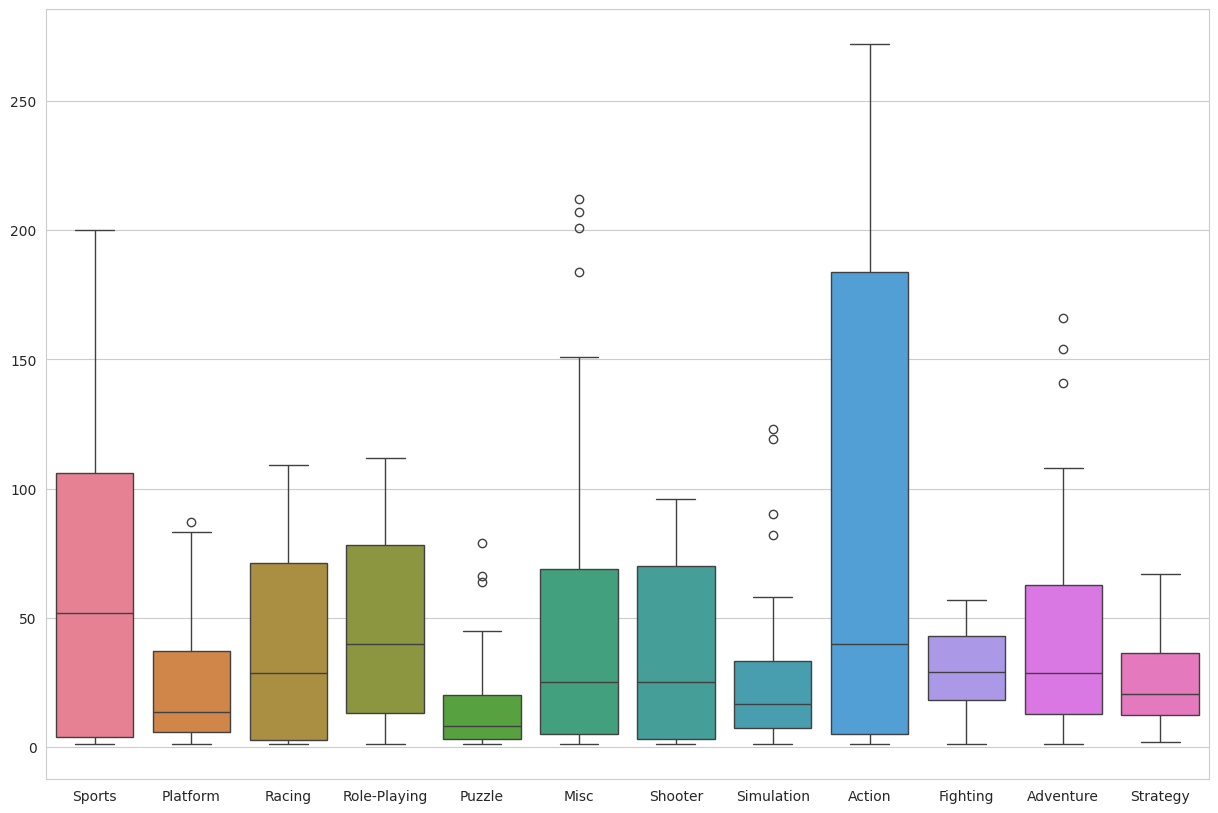

In [34]:
# Mostramos la distribución de número de juegos por género a lo largo de los años

plt.figure(figsize=(15, 10))
sns.boxplot(data=data2)
plt.show()

In [35]:
# Resumen de cinco números de la distribución

data2.describe()

,Sports,Platform,Racing,Role-Playing,Puzzle,Misc,Shooter,Simulation,Action,Fighting,Adventure,Strategy
count,37.000000,36.000000,32.000000,31.000000,33.000000,31.000000,36.000000,30.000000,37.000000,29.000000,28.000000,26.000000
mean,62.270270,24.333333,38.312500,47.387097,17.303030,55.161290,35.611111,28.333333,87.891892,28.827586,45.571429,25.807692
std,64.293446,24.818196,34.603223,38.108335,20.966469,67.783035,34.011996,34.049997,95.944366,17.748378,47.492244,18.704051
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,4.000000,5.750000,2.750000,13.000000,3.000000,5.000000,3.000000,7.250000,5.000000,18.000000,12.750000,12.500000
50%,52.000000,13.500000,28.500000,40.000000,8.000000,25.000000,25.000000,16.500000,40.000000,29.000000,28.500000,20.500000
75%,106.000000,37.000000,71.000000,78.000000,20.000000,69.000000,70.000000,33.250000,184.000000,43.000000,62.750000,36.500000
max,200.000000,87.000000,109.000000,112.000000,79.000000,212.000000,96.000000,123.000000,272.000000,57.000000,166.000000,67.000000


## Diagrama de enjambre

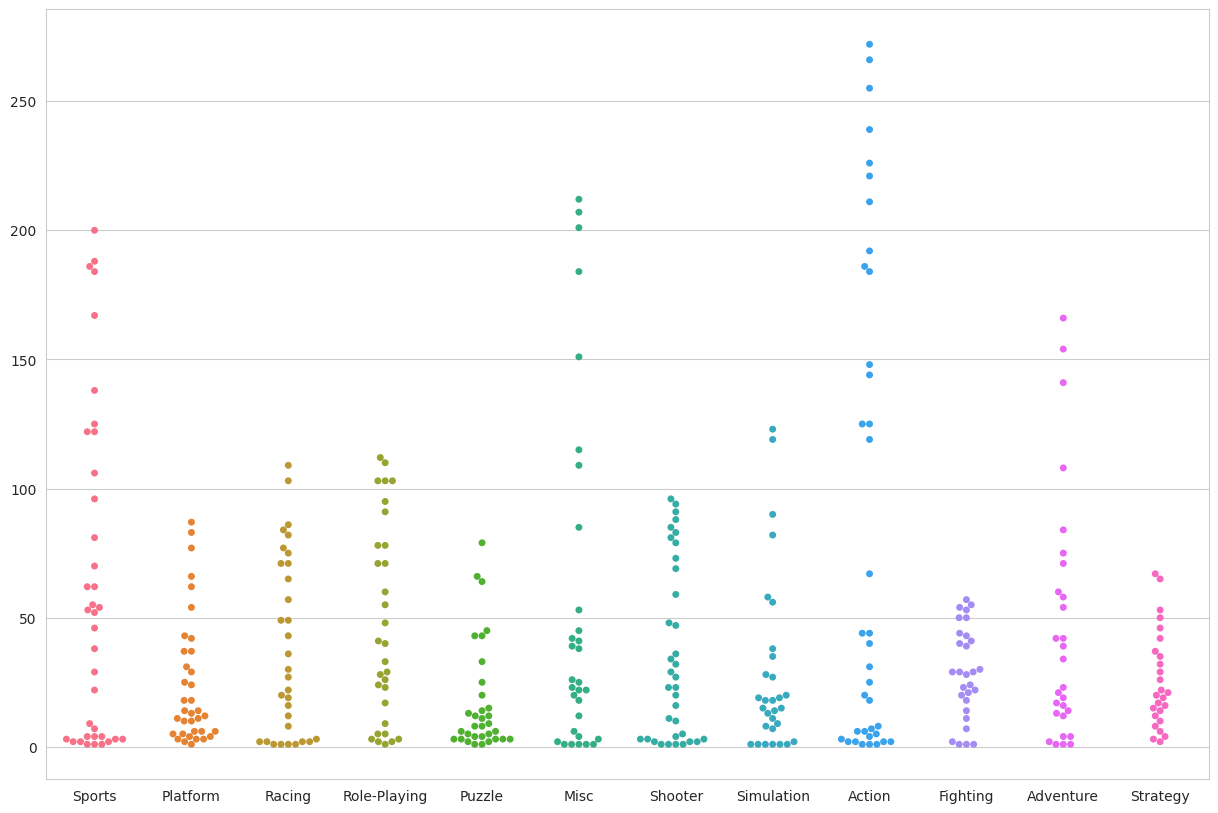

In [36]:
# Para el caso de número de juegos por plataforma y año no tenemos muchas muestras (40 por género, más o menos)
# El diagrama de enjambre permite ver cómo se distribuyen los puntos concretos en la gráfica
# Cada punto representa el número de juegos vendido uno de los años

plt.figure(figsize=(15, 10))
sns.swarmplot(data=data2)
plt.show()

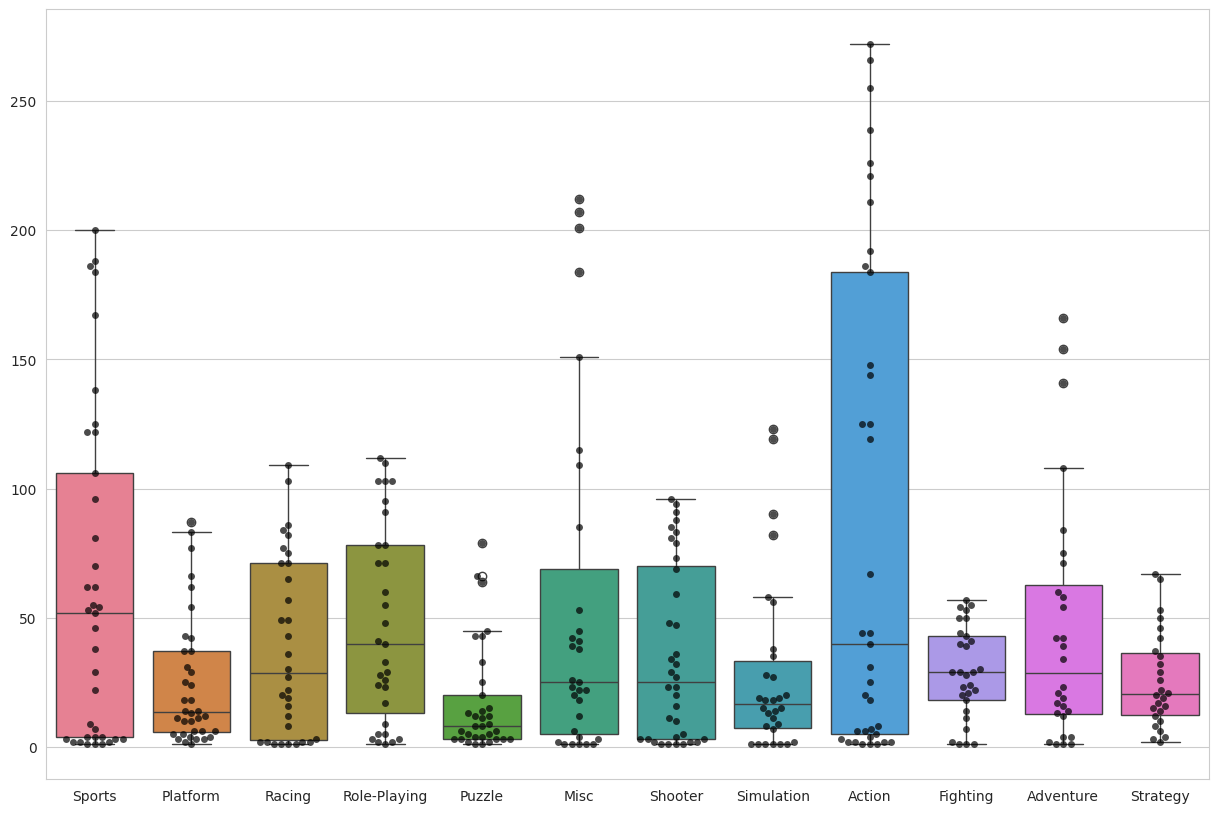

In [37]:
# Podemos superponer el gráfico de enjambre sobre el diagrama de caja para ver mejor cómo se distribuyen los puntos

plt.figure(figsize=(15, 10))
sns.boxplot(data=data2)
sns.swarmplot(data=data2, color='black', alpha=0.7)  # Puntos negros y ligeramente transparentes
plt.show()

## Diagrama de violín

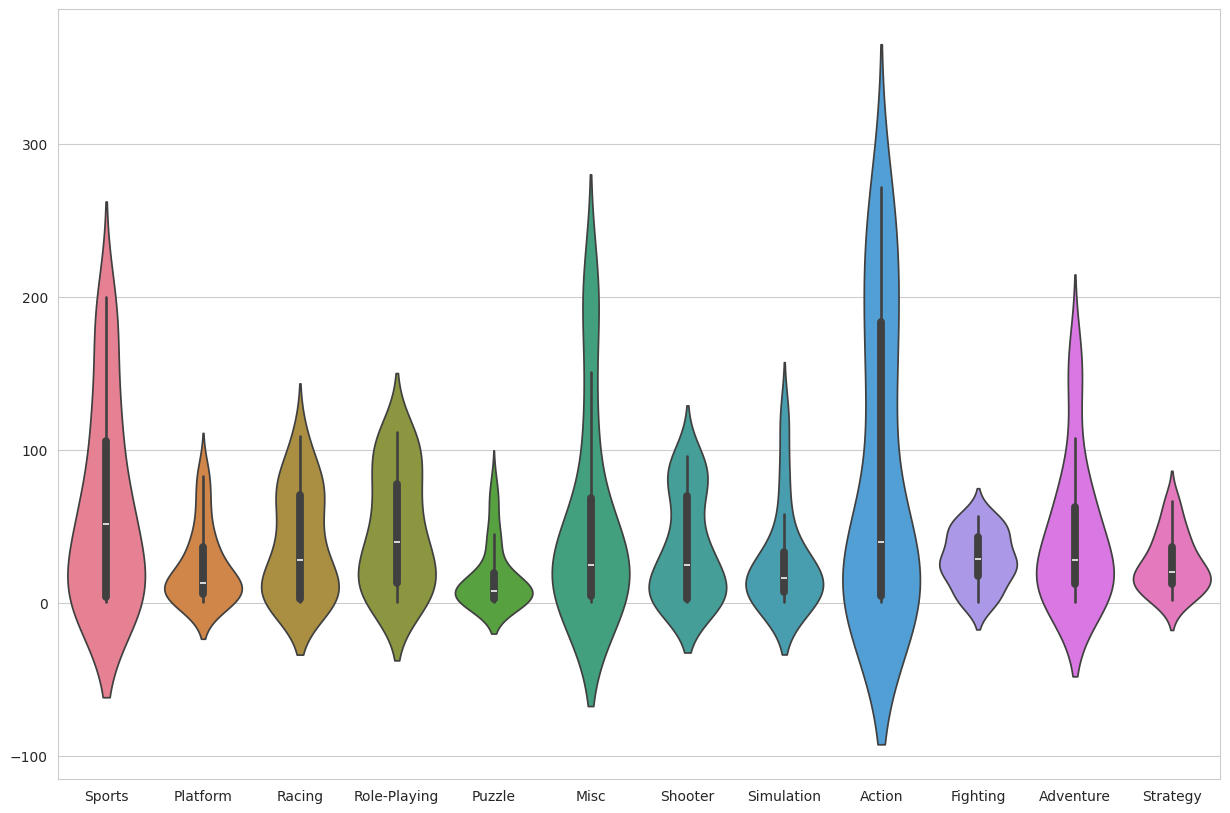

In [38]:
# Seguimos con la distribución de géneros a lo largo de los años

plt.figure(figsize=(15, 10))
sns.violinplot(data=data2)
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


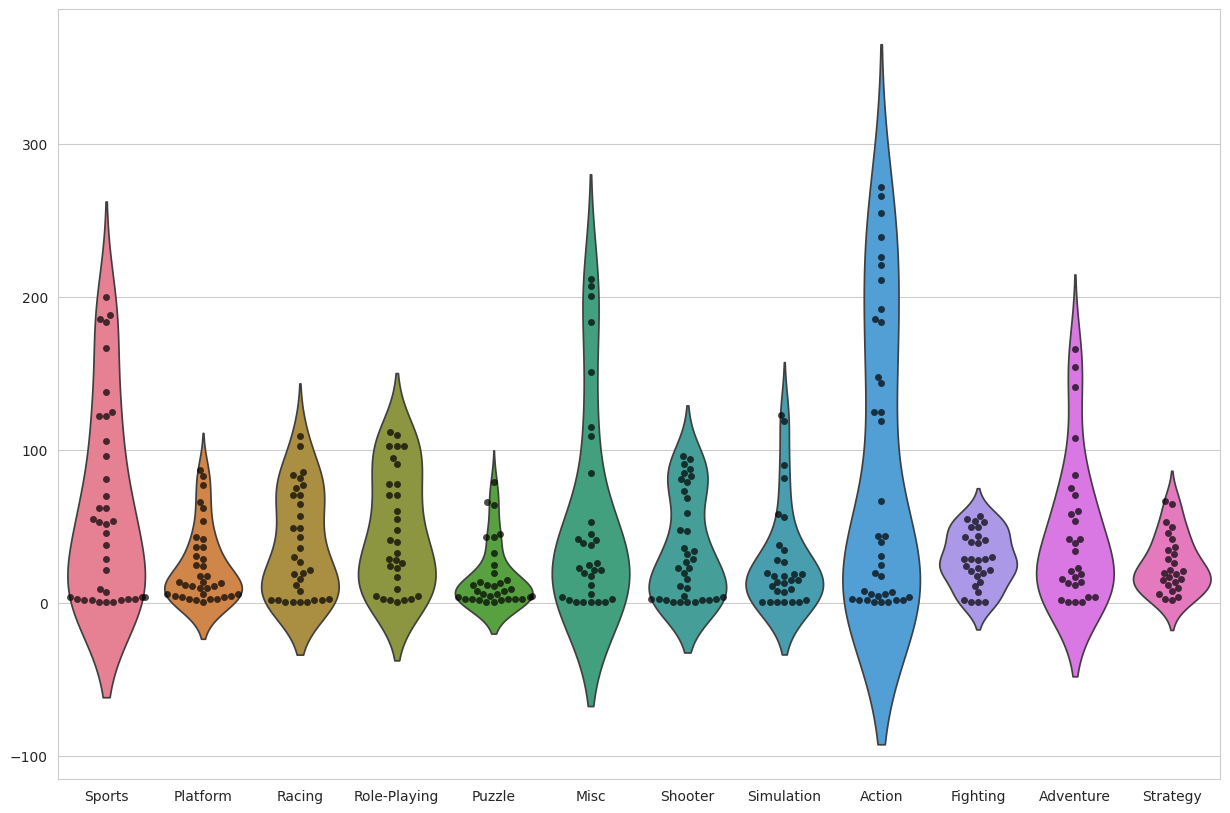

In [39]:
# Podemos rizar el rizo combinando el diagrama de violín y el gráfico de enjambre

plt.figure(figsize=(15,10))
sns.violinplot(data=data2, inner=None)  # Ocultamos las barras dentro del gráfico
sns.swarmplot(data=data2, color='black', alpha=0.7)
plt.show()

## Diagrama de árbol

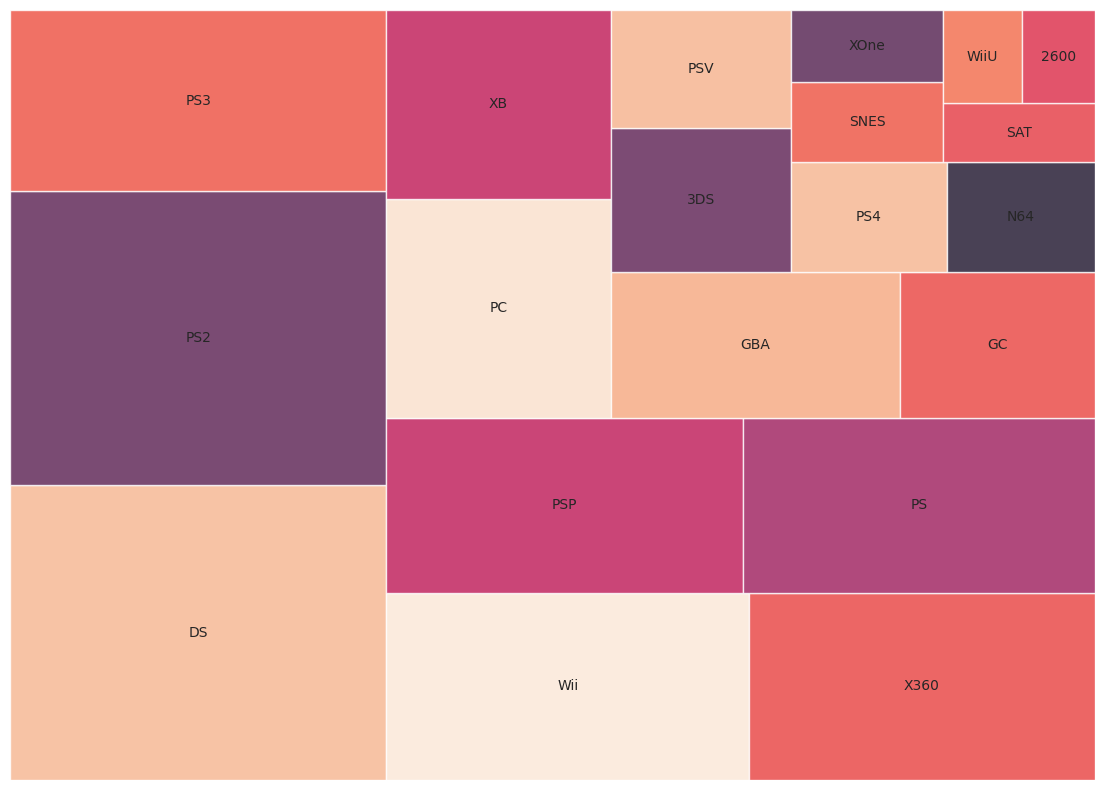

In [40]:
# Creamos un diagrama de árbol donde se vea la distribución de juegos por plataforma
# Limitamos a las 20 plataformas con más juegos, para no saturar el diagrama

games_platform = data['Platform'].value_counts()[:20]

plt.figure(figsize=(14,10))
squarify.plot(sizes=games_platform.values, label=games_platform.index, alpha=.8)
plt.axis('off')  # Ocultamos los valores de los ejes
plt.show()

## Nube de palabras

In [41]:
# Vamos a sacar todas las palabras individuales que aparecen en los nombres de los videojuegos
# La librería SpaCy nos va a ayudar a extraer las palabras

nlp = spacy.load('en_core_web_md')  # Cargamos el modelo en inglés para que Spacy use las herramientas lingüísticas de este idioma

list_words = [x.split() for x in data['Name'].values]  # Obtenemos todas las palabras individuales para cada nombre
list_words = ' '.join([word for sublist in list_words for word in sublist])  # Las juntamos todas en un único texto

corpus = nlp(list_words)  # Procesamos las palabras con SpaCy
tokens = [w.lower_ for w in corpus if (not w.is_space and not w.is_punct)]  # Eliminamos espacios en blanco y signos de puntuación
corpus = ' '.join(tokens)  # Ya tenemos la lista de palabras limpia

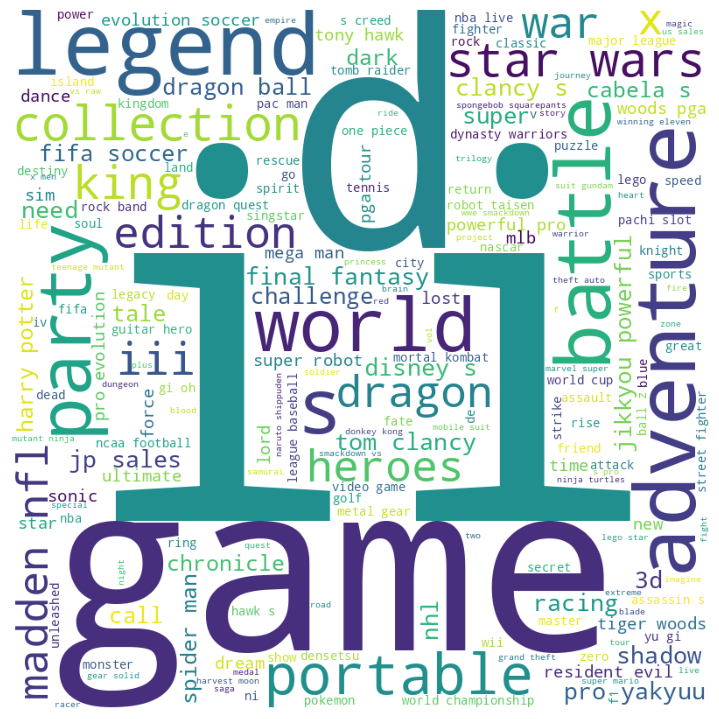

In [42]:
# Mostramos la nube de palabras en una imagen

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(corpus)
plt.figure(figsize=(7, 7), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Referencias

* [Video Game Sales](https://www.kaggle.com/gregorut/videogamesales)
* [Pyplot tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html)
* [Datasaurus](http://www.thefunctionalart.com/2016/08/download-datasaurus-never-trust-summary.html)